In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

##**Importing Dataset**

In [4]:
df = pd.read_csv("MagicBricks.csv")
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [5]:
df.shape

(1259, 11)

- Dataset have **1259** rows and **11** columns.
- There are 10 independent variables.
- One dependent variable i.e. "**Price**".
- I will be using the following models for the prediction:
  - ***Linear Regression with Lasso Regularization***
  - ***Linear Regression with Ridge Regularization***
  - ***A Neural Network for Regression***
  - ***Random Forest Regression***

## **Exploratory Data Analysis**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [7]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [8]:
# Percentage of null values in each column
df.isnull().mean() * 100

Area            0.000000
BHK             0.000000
Bathroom        0.158856
Furnishing      0.397141
Locality        0.000000
Parking         2.621128
Price           0.000000
Status          0.000000
Transaction     0.000000
Type            0.397141
Per_Sqft       19.142176
dtype: float64

<Figure size 2000x1500 with 0 Axes>

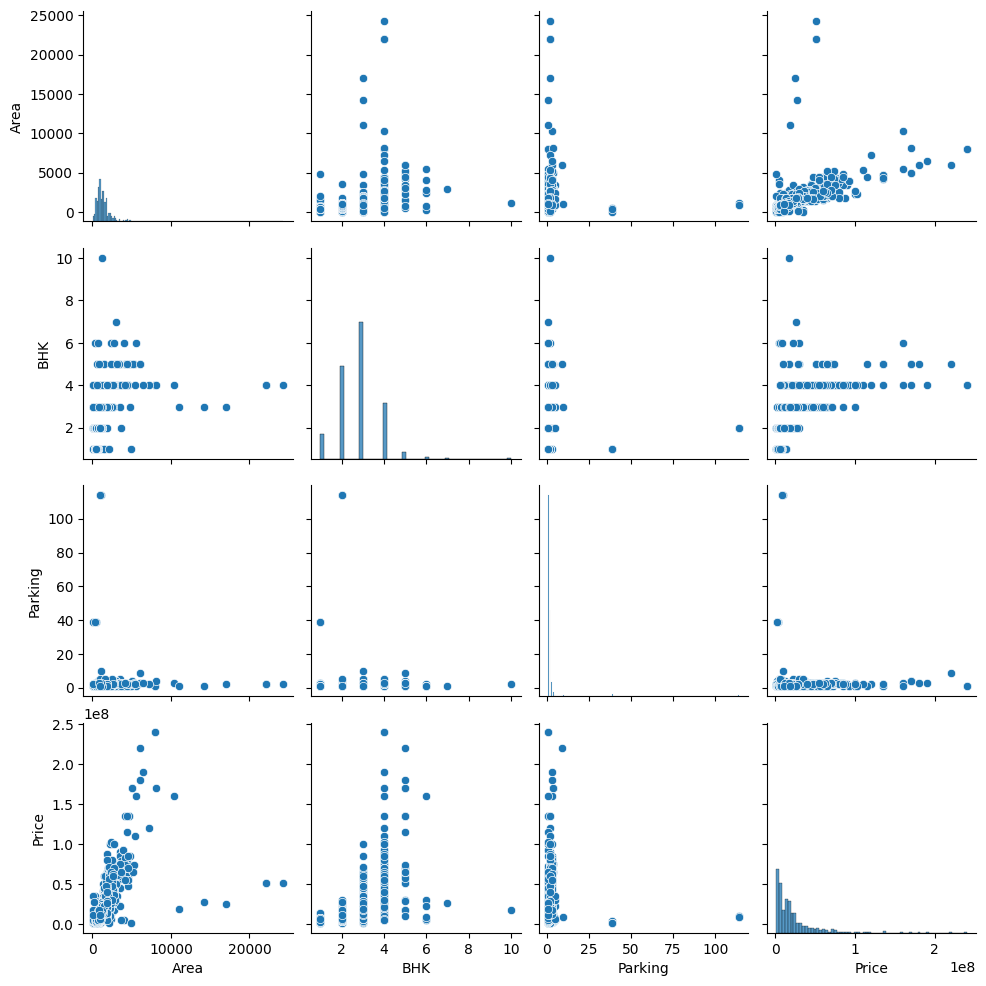

In [9]:
plt.figure(figsize = (20, 15))
sns.pairplot(df[["Area", "BHK", "Parking", "Price"]])
plt.show()

<Figure size 2000x1200 with 0 Axes>

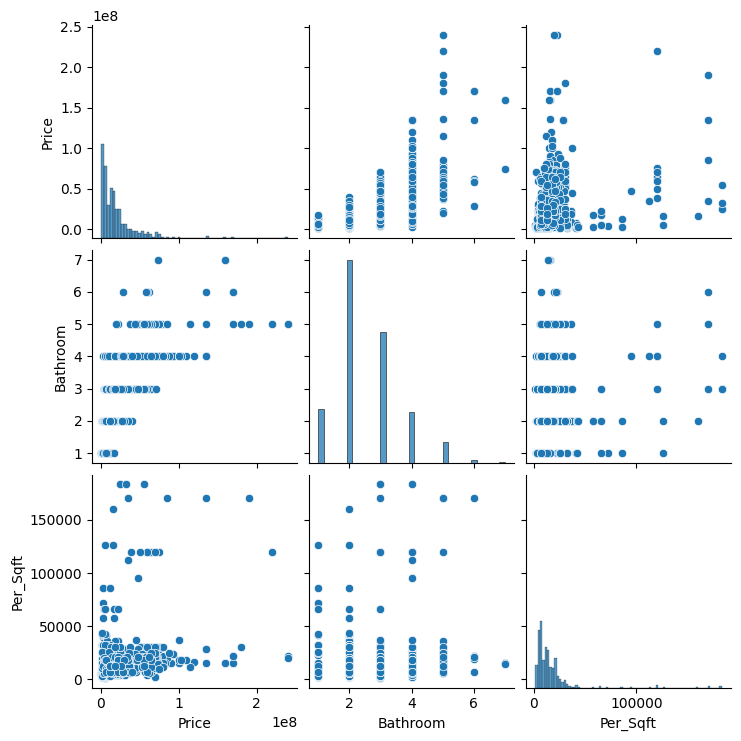

In [10]:
plt.figure(figsize = (20, 12))
sns.pairplot(df[["Price", "Bathroom", "Per_Sqft"]])
plt.show()

###Data Cleaning

In [11]:
# Filling missing values
df["Per_Sqft"].fillna(df["Per_Sqft"].mean(), inplace = True)
df["Parking"].fillna(df["Parking"].median(), inplace = True)
df["Bathroom"].fillna(df["Bathroom"].median(), inplace = True)
df["Furnishing"].fillna("Semi-Furnished", inplace = True)

In [12]:
df.dropna(inplace = True)

In [13]:
df.isnull().mean() * 100

Area           0.0
BHK            0.0
Bathroom       0.0
Furnishing     0.0
Locality       0.0
Parking        0.0
Price          0.0
Status         0.0
Transaction    0.0
Type           0.0
Per_Sqft       0.0
dtype: float64

In [14]:
df.shape

(1254, 11)

<Axes: xlabel='Status', ylabel='Price'>

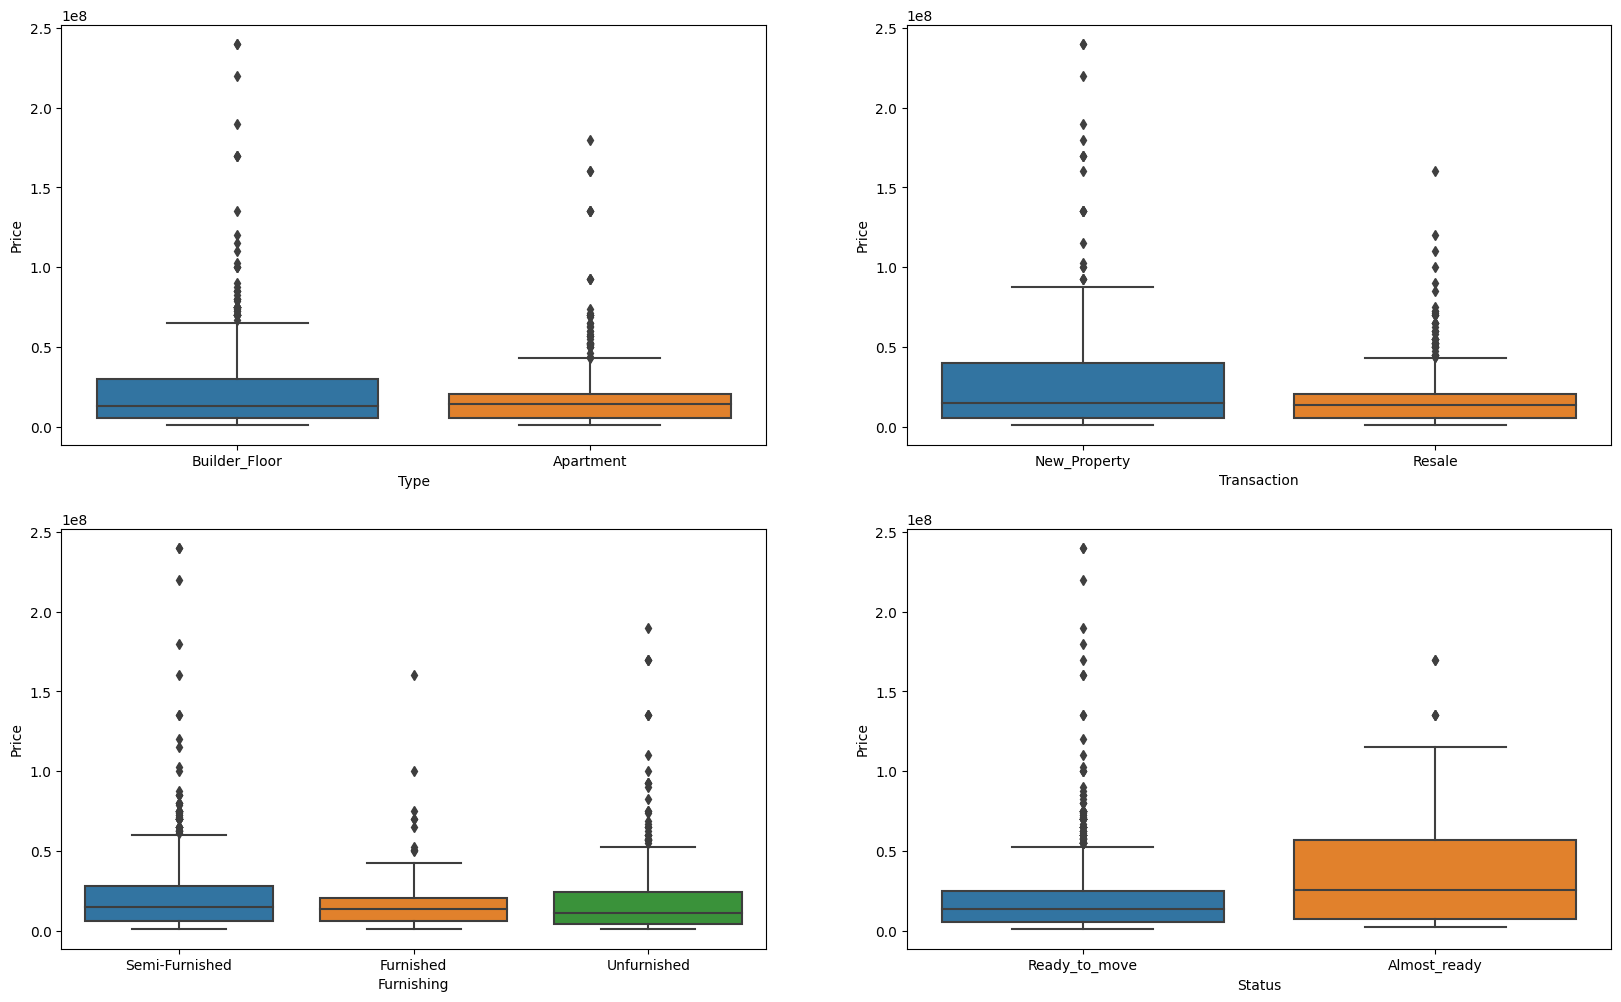

In [15]:
plt.figure(figsize = (20, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x = "Type", y = "Price", data = df)

plt.subplot(2, 2, 2)
sns.boxplot(x = "Transaction", y = "Price", data = df)

plt.subplot(2, 2, 3)
sns.boxplot(x = "Furnishing", y = "Price", data = df)

plt.subplot(2, 2, 4)
sns.boxplot(x = "Status", y = "Price", data = df)

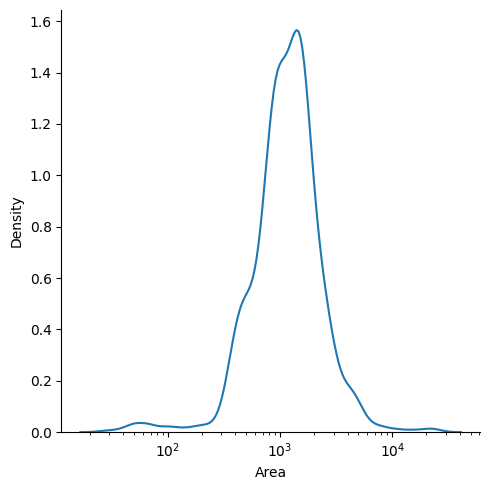

In [16]:
sns.displot(df["Area"], kind = "kde", log_scale = True)

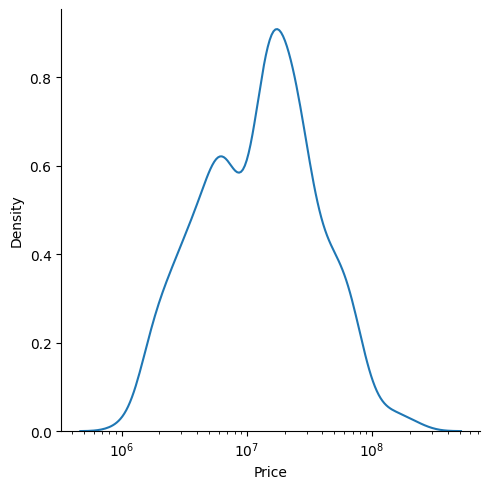

In [17]:
sns.displot(df["Price"], kind = "kde", log_scale = True)

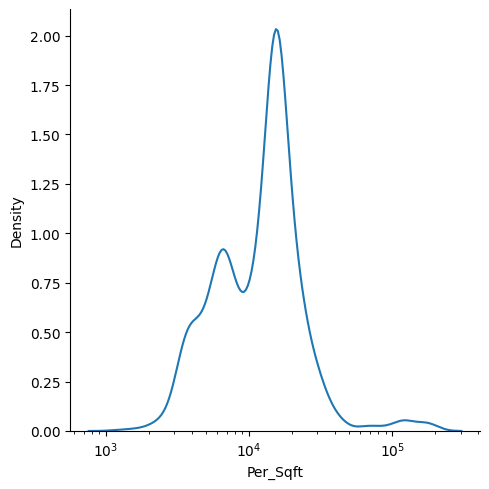

In [18]:
sns.displot(df["Per_Sqft"], kind = 'kde', log_scale = True)

During the analysis of the "Locality" column, it was found that many rows contains the full address of the house instead of the locality name. So I managed to extract the locality from the address. Some values did not contain any locality name from the list, so I replaced them with "Delhi" instead.

In [19]:
Localities = ["Ashok Nagar",
"Bali Nagar",
"Fateh Nagar",
"Kirti Nagar",
"Moti Nagar",
"Paschim Vihar",
"Patel Nagar",
"Punjabi Bagh",
"Rajouri Garden",
"Tihar Village",
"Tilak Nagar",
"Vikas Nagar",
"Vikaspuri",
"Uttam Nagar",
"Dabri",
"Dwarka Sub City",
"Delhi Cantonment",
"Dhaula Kuan",
"Inderpuri",
"Mahipalpur",
"Moti Bagh",
"Munirka",
"Najafgarh",
"Naraina",
"Palam",
"Rama Krishna Puram",
"Sagar Pur",
"Vasant Kunj",
"Vasant Vihar",
"Jor Bagh",
"Lodhi Colony",
"Khan Market",
"Sundar Nagar",
"Nizamuddin East",
"Nizamuddin West",
"Sarai Kale Khan",
"Jangpura",
"Defence Colony",
"Lajpat Nagar",
"New Friends Colony",
"Nehru Place",
"Kalkaji",
"East of Kailash",
"Chittaranjan Park",
"Govindpuri",
"Greater Kailash",
"Alaknanda",
"Jamia Nagar",
"Okhla",
"Sarita Vihar",
"Jaitpur",
"Tughlaqabad",
"Badarpur",
"Pul Pehladpur",
"East Vinod Nagar",
"Jhilmil Colony",
"Laxmi Nagar",
"Mayur Vihar",
"Pandav Nagar",
"Preet Vihar",
"Anand Vihar",
"Shreshtha Vihar",
"Vivek Vihar",
"Vasundhara Enclave",
"Vishwas Nagar",
"Vivek Vihar",
"Kamal Hans Nagar",
"Ram Vihar",
"Surajmal Vihar",
"Bank Enclave",
"Park End",
"Yojna Vihar",
"Chattarpur",
"Green Park",
"Gulmohar Park",
"Hauz Khas",
"Hauz Khas Village",
"Khanpur",
"Malviya Nagar",
"Mehrauli",
"Neeti Bagh",
"Netaji Nagar",
"Safdarjung Enclave",
"Sainik Farm",
"Saket",
"Sangam Vihar",
"Sarojini Nagar",
"Sarvodaya Enclave",
"Siri Fort",
"South Extension",
"Sriniwaspuri",
"Adarsh Nagar",
"Ashok Vihar",
"Begum Pur",
"Karala",
"Narela",
"Pitam Pura",
"Rohini Sub City",
"Shalimar Bagh",
"Azadpur",
"Civil Lines",
"Derawal Nagar",
"Gulabi Bagh",
"Kamla Nagar",
"Kashmiri Gate",
"Daryaganj",
"Model Town",
"Sadar Bazaar",
"Sarai Rohilla",
"Shakti Nagar",
"Tis Hazari",
"Timarpur",
"Wazirabad",
"GTB Nagar",
"Mukherjee Nagar",
"Dilshad Garden",
"Naveen Shahdara",
"New Usmanpur",
"Shahdara",
"Shastri Park",
"Yamuna Vihar",
"Gokal Puri",
"Ganga Vihar",
"Bhajan Pura",
"Chandni Chowk",
"Daryaganj",
"Jhandewalan",
"Karol Bagh",
"Shastri Nagar",
"Kishanganj",
"Paharganj",
"Rajender Nagar",
"Barakhamba Road",
"Chanakyapuri",
"Connaught Place",
"Gole Market",
"INA Colony",
"Laxmibai Nagar",
"Pragati Maidan",
"Dwarka",
"Sultanpur",
"New Friends Colony",
"Sheikh Sarai",
"Commonwealth Games Village",
"Manglapuri",
"Budh Vihar"]

In [20]:
def fun(x):
    x = str(x)
    x = x.lower()
    for i in Localities:
        if x.find(i.lower()) != -1:
            return i
    return "Delhi"

In [21]:
df["Locality"] = df["Locality"].apply(fun)

In [22]:
df["Locality"].value_counts()

Delhi                         146
Lajpat Nagar                   90
Dwarka                         87
Shahdara                       65
Alaknanda                      56
Greater Kailash                44
Patel Nagar                    36
Laxmi Nagar                    34
Okhla                          33
Vasant Kunj                    33
Kalkaji                        32
Karol Bagh                     32
New Friends Colony             31
Saket                          30
Commonwealth Games Village     30
Paschim Vihar                  30
Hauz Khas                      30
Narela                         30
Kirti Nagar                    30
Malviya Nagar                  30
Dilshad Garden                 30
Mehrauli                       30
Sheikh Sarai                   30
Punjabi Bagh                   30
Vasundhara Enclave             29
Chittaranjan Park              28
Safdarjung Enclave             28
Sultanpur                      27
Sarita Vihar                   27
Uttam Nagar   

In [23]:
df2 = df[df.Locality != "Delhi"]
df2.shape

(1108, 11)

In [24]:
df = df2

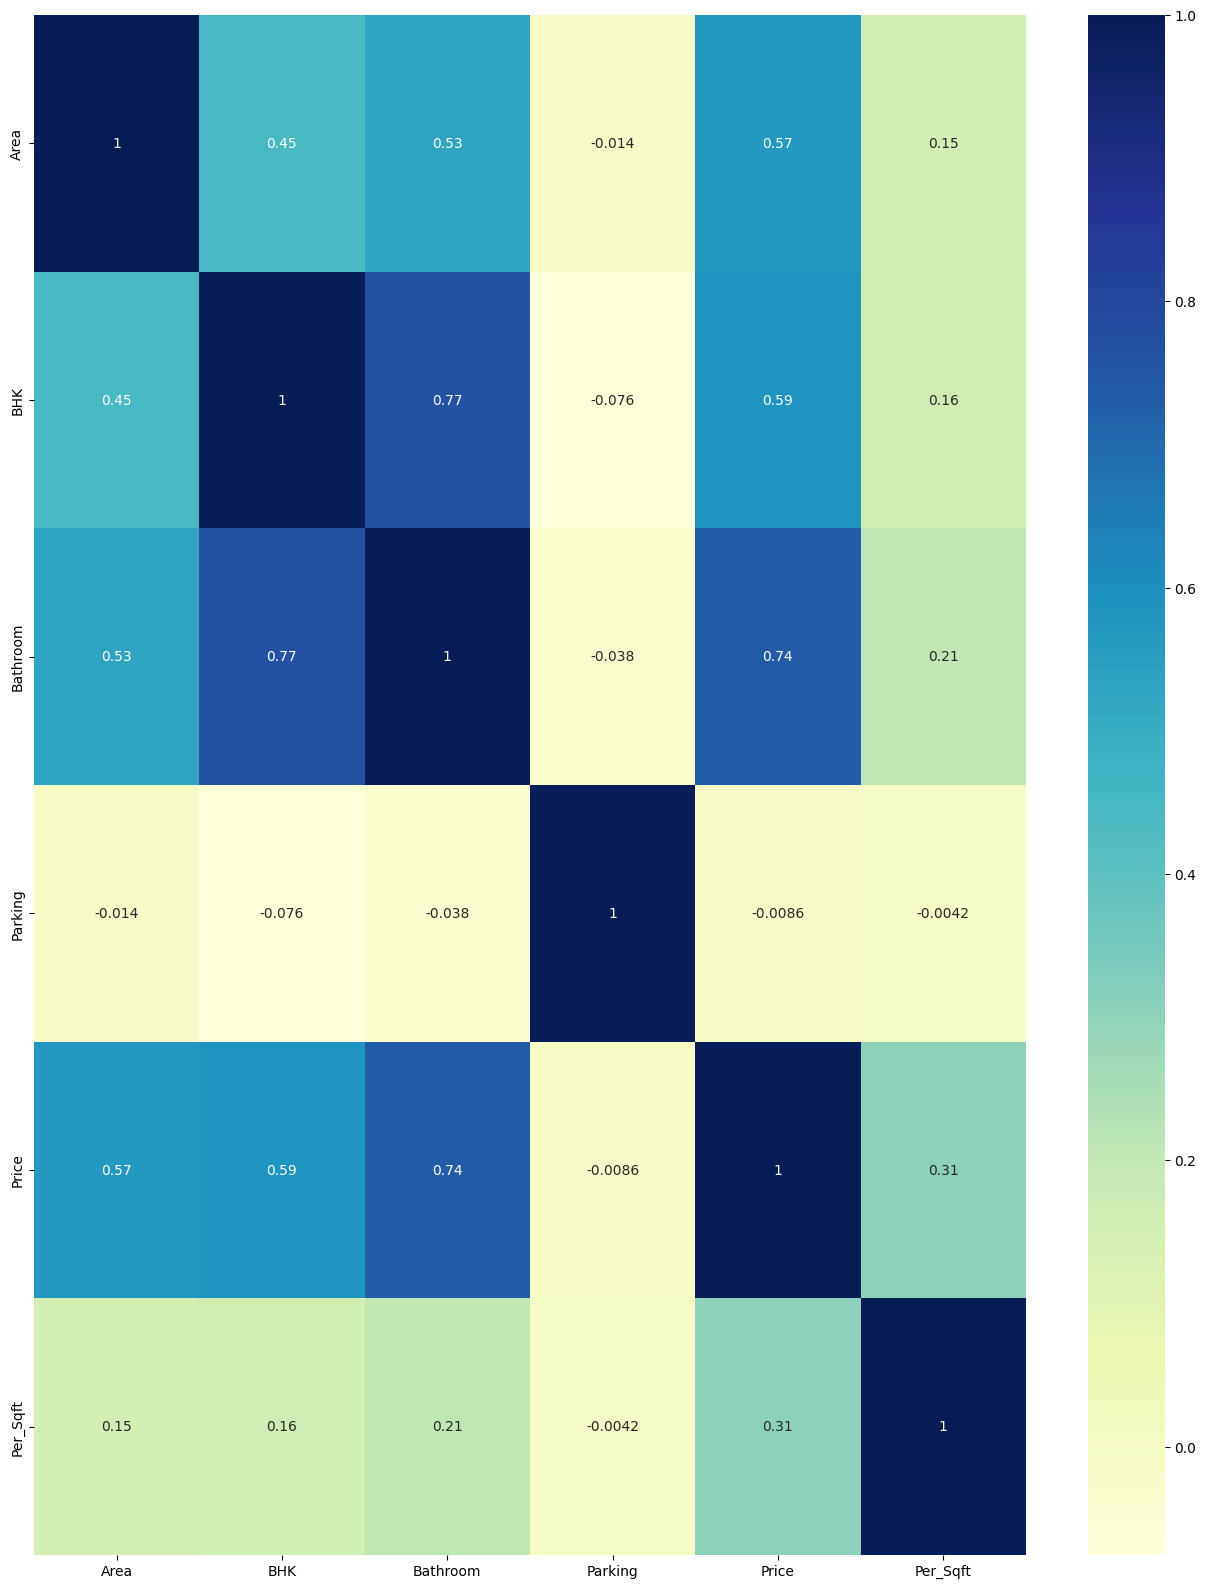

In [25]:
plt.figure(figsize = (16, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Dummy variables for following features-
- Furnishing
- Locality
- Transaction
- Type
- Status

In [26]:
temp1 = pd.get_dummies(df["Furnishing"], drop_first = True)
temp2 = pd.get_dummies(df["Locality"], drop_first = True)
temp3 = pd.get_dummies(df["Transaction"], drop_first = True)
temp4 = pd.get_dummies(df["Type"], drop_first = True)
temp5 = pd.get_dummies(df["Status"], drop_first = True)

df = pd.concat([df, temp1, temp2, temp3, temp4, temp5], axis = 1)
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,...,Sheikh Sarai,Sultanpur,Uttam Nagar,Vasant Kunj,Vasant Vihar,Vasundhara Enclave,Vishwas Nagar,Resale,Builder_Floor,Ready_to_move
30,1500.0,1,2.0,Unfurnished,Lajpat Nagar,1.0,13500000,Ready_to_move,Resale,Apartment,...,0,0,0,0,0,0,0,1,0,1
31,800.0,2,2.0,Unfurnished,Lajpat Nagar,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,...,0,0,0,0,0,0,0,0,1,1
32,900.0,2,2.0,Unfurnished,Lajpat Nagar,1.0,10500000,Ready_to_move,New_Property,Builder_Floor,...,0,0,0,0,0,0,0,0,1,1
33,1080.0,3,2.0,Semi-Furnished,Lajpat Nagar,1.0,22500000,Ready_to_move,New_Property,Builder_Floor,...,0,0,0,0,0,0,0,0,1,1
34,750.0,2,2.0,Unfurnished,Lajpat Nagar,1.0,13600000,Ready_to_move,New_Property,Builder_Floor,...,0,0,0,0,0,0,0,0,1,1


In [27]:
df.shape

(1108, 57)

Log Transformation on following variables :-
- Area
- Per_Sqft
- Price

In [28]:
df["Trans_area"] = np.log(df["Area"])
df["Trans_Per_Sqft"] = np.log(df["Per_Sqft"])
df["Trans_Price"] = np.log(df["Price"])
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,...,Vasant Kunj,Vasant Vihar,Vasundhara Enclave,Vishwas Nagar,Resale,Builder_Floor,Ready_to_move,Trans_area,Trans_Per_Sqft,Trans_Price
30,1500.0,1,2.0,Unfurnished,Lajpat Nagar,1.0,13500000,Ready_to_move,Resale,Apartment,...,0,0,0,0,1,0,1,7.313220,9.660788,16.418200
31,800.0,2,2.0,Unfurnished,Lajpat Nagar,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,...,0,0,0,0,0,1,1,6.684612,9.660788,16.523561
32,900.0,2,2.0,Unfurnished,Lajpat Nagar,1.0,10500000,Ready_to_move,New_Property,Builder_Floor,...,0,0,0,0,0,1,1,6.802395,9.660788,16.166886
33,1080.0,3,2.0,Semi-Furnished,Lajpat Nagar,1.0,22500000,Ready_to_move,New_Property,Builder_Floor,...,0,0,0,0,0,1,1,6.984716,9.660788,16.929026
34,750.0,2,2.0,Unfurnished,Lajpat Nagar,1.0,13600000,Ready_to_move,New_Property,Builder_Floor,...,0,0,0,0,0,1,1,6.620073,9.660788,16.425580


In [29]:
df.drop(["Area", "Price", "Per_Sqft", "Locality", "Furnishing", "Status", "Transaction", "Type"], axis = 1, inplace = True)
df.shape

(1108, 52)

In [30]:
df.head()

,BHK,Bathroom,Parking,Semi-Furnished,Unfurnished,Ashok Nagar,Budh Vihar,Chandni Chowk,Chattarpur,Chittaranjan Park,...,Vasant Kunj,Vasant Vihar,Vasundhara Enclave,Vishwas Nagar,Resale,Builder_Floor,Ready_to_move,Trans_area,Trans_Per_Sqft,Trans_Price
30,1,2.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,7.313220,9.660788,16.418200
31,2,2.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,6.684612,9.660788,16.523561
32,2,2.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,6.802395,9.660788,16.166886
33,3,2.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,6.984716,9.660788,16.929026
34,2,2.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,6.620073,9.660788,16.425580


## **Model Building**

In [31]:
# Train Test Split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
print(df_train.shape, df_test.shape)

(775, 52) (333, 52)


In [33]:
# Normalizing the values before training
scaler = MinMaxScaler()

In [34]:
num_vars = ["BHK", "Bathroom", "Parking", "Trans_Price", "Trans_area", "Trans_Per_Sqft"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,BHK,Bathroom,Parking,Semi-Furnished,Unfurnished,Ashok Nagar,Budh Vihar,Chandni Chowk,Chattarpur,Chittaranjan Park,...,Vasant Kunj,Vasant Vihar,Vasundhara Enclave,Vishwas Nagar,Resale,Builder_Floor,Ready_to_move,Trans_area,Trans_Per_Sqft,Trans_Price
1177,0.222222,0.333333,0.00885,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.512375,0.476994,0.392612
1061,0.222222,0.166667,0.00000,0,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0.496272,0.356104,0.379416
291,0.222222,0.333333,0.00000,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0.533735,0.538300,0.590931
584,0.333333,0.500000,0.00000,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0.724253,0.464827,0.781585
1007,0.111111,0.166667,0.00000,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0.468406,0.387862,0.243585


In [35]:
y_train = df_train.pop("Trans_Price")
x_train = df_train

In [36]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,BHK,Bathroom,Parking,Semi-Furnished,Unfurnished,Ashok Nagar,Budh Vihar,Chandni Chowk,Chattarpur,Chittaranjan Park,...,Vasant Kunj,Vasant Vihar,Vasundhara Enclave,Vishwas Nagar,Resale,Builder_Floor,Ready_to_move,Trans_area,Trans_Per_Sqft,Trans_Price
1044,0.222222,0.166667,0.00000,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0.540240,0.313913,0.487926
706,0.111111,0.166667,0.00885,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0.563800,0.428635,0.481524
915,0.111111,0.333333,0.00885,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0.496272,0.465830,0.460846
454,0.333333,0.333333,0.00885,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0.584209,0.476994,0.576028
1207,0.222222,0.333333,0.00885,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0.526942,0.614894,0.532378


In [37]:
y_test = df_test.pop('Trans_Price')
x_test = df_test

#### Model 1: Linear Regression with Ridge Regularization

In [38]:
model = Ridge()

# Performing Grid Search with hyperparameter tuning
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='r2', cv=cv, n_jobs=-1)
results = search.fit(x_train, y_train)

# summarize
print('r2_score: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

r2_score: 0.823
Config: {'alpha': 0.86}


In [39]:
model = Ridge(alpha = 0.33)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
m1_train_score = r2_score(y_train, y_train_pred)
m1_train_score

0.8565644678969119

In [40]:
y_test_pred = model.predict(x_test)
m1_test_score = r2_score(y_test, y_test_pred)
m1_test_score

0.8438925068829526

#### Model 2: Linear Regression with Lasso Regularization

In [41]:
model = Lasso()

# Grid Search with hyperparameter tuning
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
search = GridSearchCV(model, grid, scoring='r2', cv=cv, n_jobs=-1)
results = search.fit(x_train, y_train)

# summarize
print('r2_score: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

r2_score: 0.819
Config: {'alpha': 1e-05}


In [42]:
model = Lasso(alpha = 0.00001)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
m2_train_score = r2_score(y_train, y_train_pred)
m2_train_score

0.8576382690759273

In [43]:
y_test_pred = model.predict(x_test)
m2_test_score = r2_score(y_test, y_test_pred)
m2_test_score

0.844462947591262

#### Model 3: A Neural Network

In [44]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.3))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.3))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.3))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.3))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6656      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [45]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [46]:
NN_model.fit(x = x_train, y = y_train, validation_data = [x_test, y_test], epochs=250, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/250
25/25 [==============================] - 3s 22ms/step - loss: 0.7134 - mean_absolute_error: 0.7134 - val_loss: 0.2849 - val_mean_absolute_error: 0.2849
Epoch 2/250
25/25 [==============================] - 0s 14ms/step - loss: 0.5618 - mean_absolute_error: 0.5618 - val_loss: 0.1926 - val_mean_absolute_error: 0.1926
Epoch 3/250
25/25 [==============================] - 0s 12ms/step - loss: 0.4655 - mean_absolute_error: 0.4655 - val_loss: 0.1732 - val_mean_absolute_error: 0.1732
Epoch 4/250
25/25 [==============================] - 0s 13ms/step - loss: 0.3913 - mean_absolute_error: 0.3913 - val_loss: 0.1671 - val_mean_absolute_error: 0.1671
Epoch 5/250
25/25 [==============================] - 0s 15ms/step - loss: 0.3381 - mean_absolute_error: 0.3381 - val_loss: 0.1467 - val_mean_absolute_error: 0.1467
Epoch 6/250
25/25 [==============================] - 0s 13ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - val_loss: 0.1631 - val_mean_absolute_error: 0.1631
Epoch 7/250
25/2

In [47]:
weights_file = 'Weights-132--0.04891.hdf5' # choose the best checkpoint 
NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [48]:
y_pred = NN_model.predict(x_train)
m3_train_score = r2_score(y_train, y_pred)
m3_train_score

25/25 [==============================] - 0s 2ms/step


0.9244366709793338

In [49]:
y_pred = NN_model.predict(x_test)
m3_test_score = r2_score(y_test, y_pred)
m3_test_score

11/11 [==============================] - 0s 3ms/step


0.8756949639721893

####Model 3: Random Forest Regressor 

In [51]:
## Define Grid 
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [53]:
y_pred = CV_rfr.predict(x_train)
m4_train_score = r2_score(y_train, y_pred)
m4_train_score

0.8835444069938715

In [54]:
y_pred = CV_rfr.predict(x_test)
m4_test_score = r2_score(y_test, y_pred)
m4_test_score

0.8426104867381532

In [87]:
score_dict = {'Model': ["Ridge Regression", "Lasso Regression", "Neural Network", "Random Forest Regression"],
              'Training R2 Score': [m1_train_score, m2_train_score, m3_train_score, m4_train_score],
              'Testing R2 Score': [m1_test_score, m2_test_score, m3_test_score, m4_test_score]}
score_df = pd.DataFrame.from_dict(score_dict)
score_df

,Model,Training R2 Score,Testing R2 Score
0,Ridge Regression,0.856564,0.843893
1,Lasso Regression,0.857638,0.844463
2,Neural Network,0.924437,0.875695
3,Random Forest Regression,0.883544,0.842610


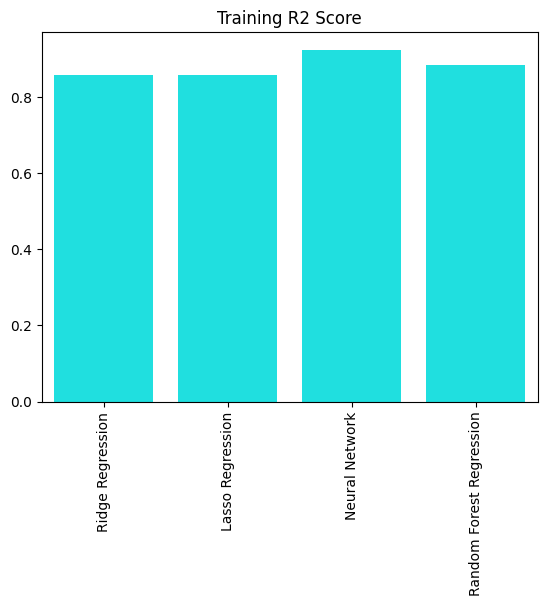

In [89]:
sns.barplot(data = score_dict, x = 'Model', y = 'Training R2 Score', color = "cyan")
plt.xticks(rotation=90)
plt.title("Training R2 Score")
plt.show()


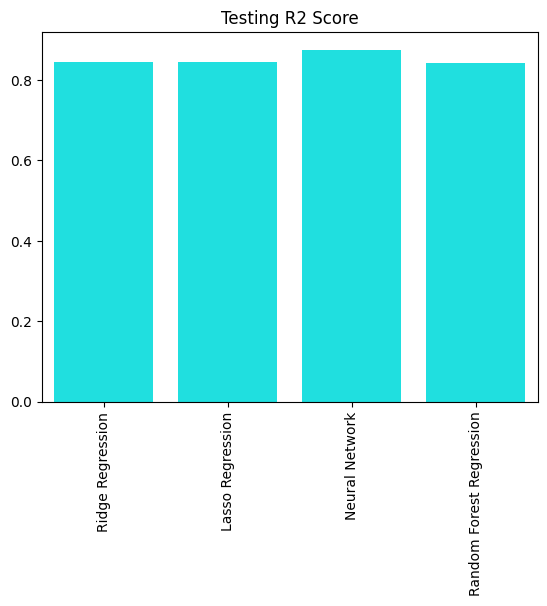

In [90]:
sns.barplot(data = score_dict, x = 'Model', y = 'Testing R2 Score', color = "cyan")
plt.xticks(rotation=90)
plt.title("Testing R2 Score")
plt.show()